# <ins>HW4 – statistics and data analysis<ins>
## Differential Gene Expression in Acute Myocardial Infraction

In [1]:
import warnings
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

warnings.filterwarnings('ignore')

### Observing the data

In [2]:
data = pd.read_csv('AMI_GSE66360_series_matrix.csv', skiprows=59, encoding='ISO-8859-1', header=None)

In [3]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,Class,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
2,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
3,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
4,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
5,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
6,1255_g_at,2.792047952,2.69571445,2.580181122,2.712123845,2.723686912,2.70668403,2.674746672,2.635149735,2.696649177,...,2.924657514,2.714103313,3.635944854,2.710943641,2.979380765,3.73013912,2.914867562,3.013901455,2.729319786,3.151449425
7,1294_at,9.290410779,9.462275035,9.116776316,9.134584186,9.582343511,9.538661422,9.837551637,10.11188891,9.629918501,...,8.596478981,7.946866042,8.57628061,8.762451755,7.143351687,7.355729877,7.944294937,8.563122679,8.699221635,8.194374083
8,1316_at,6.998285145,6.558214949,6.851622539,7.357827486,7.283872601,7.43717345,7.127690377,8.214922404,7.415155953,...,5.867730571,5.939551491,7.529577619,6.325740711,5.420595545,6.206879166,6.638364166,7.379567509,6.598349589,6.133298023
9,1320_at,5.348943925,5.410884095,5.254073031,5.242139865,5.219483996,5.408639388,5.111689416,5.61726259,5.317689635,...,5.78931739,5.198087208,7.342617602,5.501749787,6.335446059,6.217929861,5.992343792,5.766028609,5.577456268,6.193797335


In [4]:
data.dtypes

0     object
1     object
2     object
3     object
4     object
       ...  
95    object
96    object
97    object
98    object
99    object
Length: 100, dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54677 entries, 0 to 54676
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       54677 non-null  object
 1   1       54676 non-null  object
 2   2       54676 non-null  object
 3   3       54677 non-null  object
 4   4       54676 non-null  object
 5   5       54676 non-null  object
 6   6       54677 non-null  object
 7   7       54676 non-null  object
 8   8       54677 non-null  object
 9   9       54676 non-null  object
 10  10      54676 non-null  object
 11  11      54675 non-null  object
 12  12      54676 non-null  object
 13  13      54675 non-null  object
 14  14      54676 non-null  object
 15  15      54677 non-null  object
 16  16      54677 non-null  object
 17  17      54677 non-null  object
 18  18      54677 non-null  object
 19  19      54676 non-null  object
 20  20      54675 non-null  object
 21  21      54677 non-null  object
 22  22      54677 non-nul

### Re-arrange the data

In [6]:
data = data.T
data.columns = data.iloc[0][:]
data = data.iloc[1:, :]

In [7]:
print(f"The data includes {data.isna().sum().sum()} NA values")

The data includes 47 NA values


### <ins>High level description of the data and some pre-processing</ins>
1. How many genes profiled? 
2. How many samples (subjects/patients) in total?
3. How many samples in each class?
4. If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [8]:
print(f"1. There are {data.shape[1]-2} genes profiled\n2. There are {data.shape[0]} samples (subjects/patients) in total")
print(f"3. There are {data.Class.value_counts()[0]} healty patients, and {data.Class.value_counts()[1]} Myocardial Infraction patients")
# removing na's
data.dropna(how='any', inplace=True, axis=1)
print(f"4. After removing missing values there are {data.shape[1]} total rows left")

1. There are 54675 genes profiled
2. There are 99 samples (subjects/patients) in total
3. There are 50 healty patients, and 49 Myocardial Infraction patients
4. After removing missing values there are 54630 total rows left


5. Pick 20 genes at random. Draw 20 pair boxplots in one
figure comparing expression levels of each of these genes
in the two classes M and H.

In [9]:
sampled_data = pd.concat((data.iloc[:, :2], data.iloc[:, 2:].sample(n=20, axis=1)), axis=1)
box_data = pd.melt(sampled_data, id_vars=['Class','ID_REF'], var_name='gene')
box_data.value = box_data.value.astype(float)

Text(0, 0.5, '')

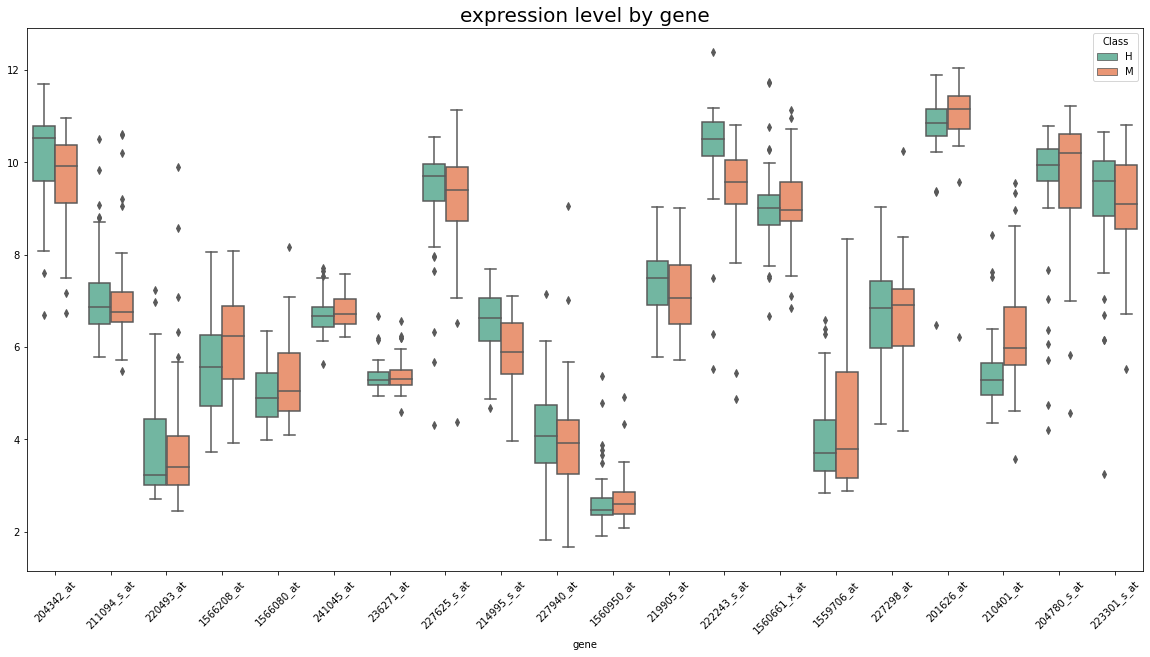

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(20,10))
sns.boxplot(data=box_data, x='gene', y='value', hue='Class', ax=axes, palette="Set2")
axes.tick_params(axis='x', rotation=45)
axes.set_title('expression level by gene', fontsize=20)
axes.set_ylabel('')

### <ins>WRS for differential expression (DE)</ins>
1. Consider some gene, g. Under the null model (which assumes that
for g there is no M vs H DE), what is the expected sum of ranks of
g’s expression levels measured for samples labeled M?

In [11]:
B = data.Class.value_counts().M
N = len(data)

E_wrs = (B*(N+1))/2
print(f"Expected sum of ranks measured for samples labeled M is {int(E_wrs)}")

Expected sum of ranks measured for samples labeled M is 2450


$E(WRS(g)) = \frac{B(N+1)}{2} = \frac{49*(99+1)}{2} = 2450$

2. Denote this sum of ranks by RS(g). What is the maximal value, c,
that RS(g) can take?

In [12]:
max_RS = sum([i for i in range(N-B+1,N+1)])
print(f"The maximal value 'c' that RS(g) can take is {max_RS}")

The maximal value 'c' that RS(g) can take is 3675


The maximal value 'c' that RS(g) can take is $RS(g) = \sum_{i=51}^{99} i = 3675$

3.  Under the null model, what is the probability of RS(g) = c?
(Provide a formula for this and explain it)

In [13]:
print(f"Under the null model, P(RS(g) = c) is {1/math.comb(99, 49)}")

Under the null model, P(RS(g) = c) is 1.9823306042836678e-29


Under the null model all of the genes are drawn from the same distribution, therefore all genes have the same probabilty. There are 49 samples labeled by 'M' and overall 99 samples. There are 49 ranks to be chosen out of 99 samples, that is:

$$P(RS(g) = c) = \frac{1}{99 \choose 49} = 1.9823306042836678e-29$$

4. Under the null model, what is the probability of RS(g) = c-1? what is
the probability of RS(g) = c-2?
(Provide formulas and explain them)

In [14]:
print(f"Under the null model, P(RS(g) = c-1) is {1/math.comb(99, 49)}")

Under the null model, P(RS(g) = c-1) is 1.9823306042836678e-29


Under the null model $P(RS(g) = c-1) = \frac{1}{99 \choose 49} = 1.9823306042836678e-29 \rightarrow$ as can be seen, this is the same value as before. The explanation for that is the fact that the rank was decreased from 51 to 50 (that is the only option to get c-1)

In [15]:
print(f"There are 2 options to get c-2:\n\t* [49, 52, ..., 99] = {sum([i for i in range(52,100)])+49}\n\t* [50, 51, 53, 54, ..., 99] = {sum([i for i in range(53,100)])+ 50 + 51}")
print(f"Under the null model, P(RS(g) = c-2) is {2/math.comb(99, 49)}")

There are 2 options to get c-2:
	* [49, 52, ..., 99] = 3673
	* [50, 51, 53, 54, ..., 99] = 3673
Under the null model, P(RS(g) = c-2) is 3.9646612085673355e-29


For c-2 there are 2 options - [49, 52, ..., 99] or [50, 51, 53, 54, ..., 99] both yeild c-2. Thus Under the null model: $$P(RS(g) = c-2) =  \frac{2}{99 \choose 49} = 3.9646612085673355e-29$$ 

5. Draw a histogram of the values of RS(g) in the dataset. Here g
ranges over all genes in the data (after the clean-up). Compute the
IQR for this distribution and present it on the plot with the histogram

In [16]:
rs_values = data.iloc[:, 2:].apply(lambda x: x.rank()[data.Class == 'M'].sum(), axis=0)

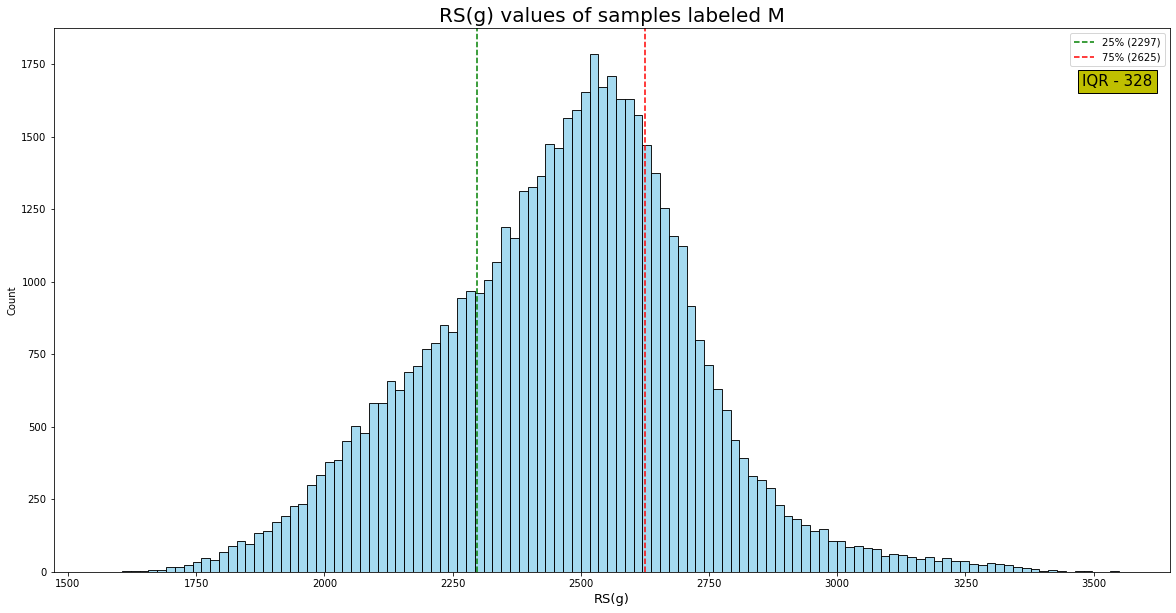

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(20,10))
hist = sns.histplot(rs_values, ax=axes, color='skyblue')
axes.axvline(np.quantile(rs_values, 0.25), color='g', linestyle='--', label=f'25% ({int(np.quantile(rs_values, 0.25))})')
axes.axvline(np.quantile(rs_values, 0.75), color='r', linestyle='--', label=f'75% ({int(np.quantile(rs_values, 0.75))})')
axes.set_xlabel('RS(g)', fontsize=13)
axes.set_title("RS(g) values of samples labeled M", fontsize=20)
axes.text(hist.get_xlim()[1]-170, hist.get_ylim()[1]-200, f"IQR - {int(np.quantile(rs_values, 0.75)-np.quantile(rs_values, 0.25))}", bbox=dict(facecolor='y'), size=15)
axes.legend()

### <ins>Differential Expression<ins>

The purpose is to determine the statistical significance of 
differential expression (DE) observed for each gene in H vs M. 
Evaluate the DE in both one-sided directions for every gene, 
using both Student t-test and WRS test.  
Report the number of genes overexpressed in M vs H (M > H) at 
a p-value better (≤) than 0.07 and separately genes 
underexpressed in M vs H (M < H) at a p-value better than 0.07. 
For both directions use both a Student t-test and a WRS test

In [18]:
alpha = 0.07*2

M = data.Class == 'M'
H = data.Class == 'H'

Ttest = data.iloc[:, 2:].apply(lambda x: stats.ttest_ind(x[M].astype(float), x[H].astype(float), equal_var=True), axis=0)
Ttest.index = ['statistic','Pvalue']
overexpressed_Ttest = Ttest.T[(Ttest.T['statistic'] > 0) & (Ttest.T['Pvalue'] <= alpha)]
underexpressed_Ttest = Ttest.T[(Ttest.T['statistic'] <= 0) & (Ttest.T['Pvalue'] <= alpha)]
print(f"\t   T-test\n{'-'*30}")
print(f"Overexpressed genes -> {overexpressed_Ttest.shape[0]}")
print(f"Underexpressed genes -> {underexpressed_Ttest.shape[0]}")

WRS = data.iloc[:, 2:].apply(lambda x: stats.ranksums(x[M].astype(float), x[H].astype(float)))
WRS.index = ['statistic','Pvalue']
overexpressed_WRS = WRS.T[(WRS.T['statistic'] > 0) & (WRS.T['Pvalue'] <= alpha)]
underexpressed_WRS = WRS.T[(WRS.T['statistic'] <= 0) & (WRS.T['Pvalue'] <= alpha)]
print(f"\n\t     WRS\n{'-'*30}")
print(f"Overexpressed genes -> {overexpressed_WRS.shape[0]}")
print(f"Underexpressed genes -> {underexpressed_WRS.shape[0]}")

	   T-test
------------------------------
Overexpressed genes -> 8517
Underexpressed genes -> 8639

	     WRS
------------------------------
Overexpressed genes -> 10787
Underexpressed genes -> 10667


### <ins>Correlations</ins>

1. Compute Kendall 𝜏 correlations in all pairs within D (160
choose 2 numbers). Represent the correlation matrix as a 160x160
heatmap. 

In [19]:
over = overexpressed_WRS.sort_values(by='Pvalue').head(80)
under = underexpressed_WRS.sort_values(by='Pvalue').head(80)
significant_genes = pd.concat((over, under)).index
cor_data = data[significant_genes].astype(float)
kendall_cor = cor_data.corr(method='kendall')

(Text(0.5, 104.09375, ''), Text(158.09375, 0.5, ''))

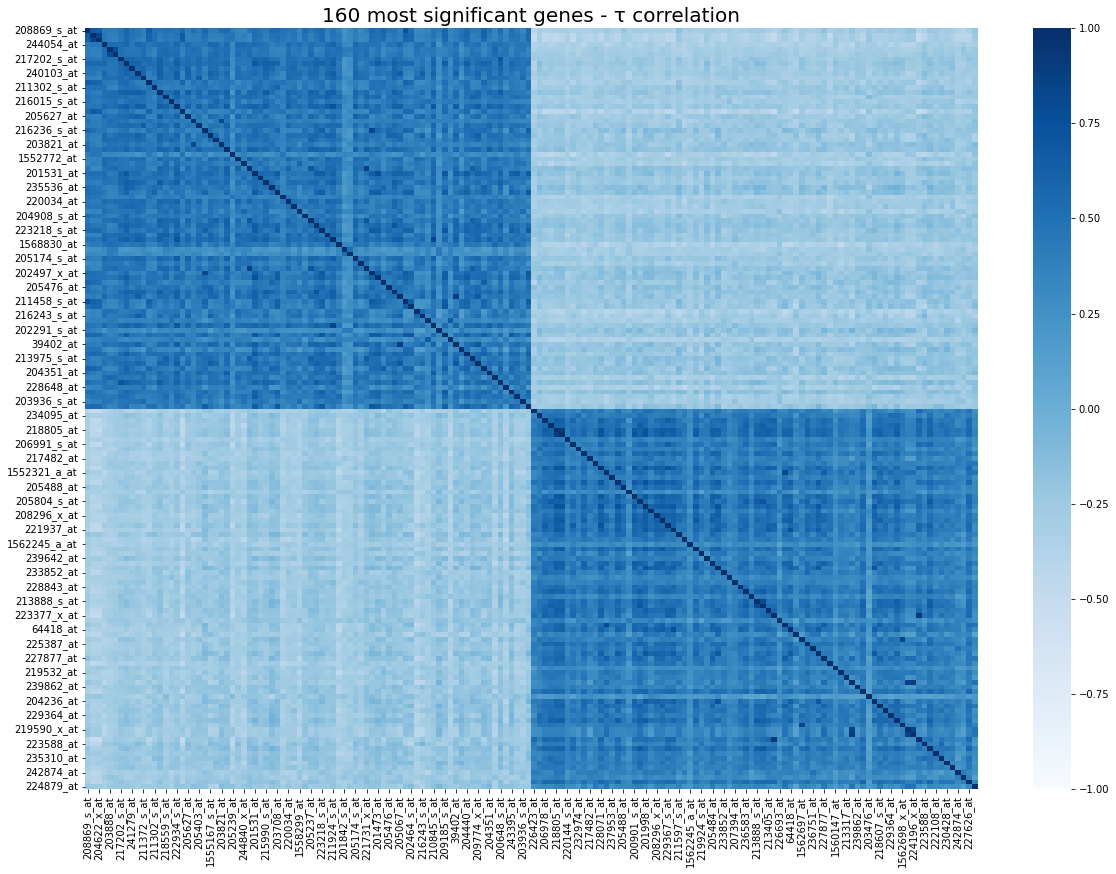

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(20,14))
sns.heatmap(kendall_cor, cmap='Blues', vmin=-1, vmax=1)
axes.set_title('160 most significant genes - τ correlation', fontsize=20)
axes.set_xlabel(''), axes.set_ylabel('')

2.  Under a NULL model that assumes that genes are pairwise
independent, what is the expected value for 𝜏? 

Under the null model that assumes that the genes are pairwise independent we would expect τ to be 0

In [21]:
print(f"The observed mean is {kendall_cor.mean().mean()}")

The observed mean is 0.09016181231892698


3. Now compute the Kendall 𝜏 correlations in all 80 choose 2 pairs
from the overexpressed genes in D. Present your results on a
histogram. What is the average value you observed?
Compare it to the value in the above section. Explain.

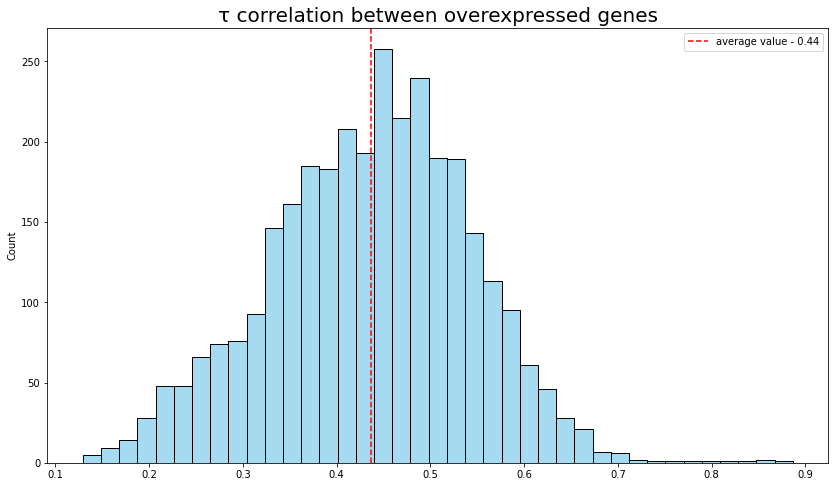

In [22]:
tau_correlations_over = data[over.index].astype(float).corr(method='kendall')
tau_correlations_over = tau_correlations_over.values[np.tril(np.ones_like(tau_correlations_over), k=-1).astype(bool)]

fig, axes = plt.subplots(1, 1, figsize=(14,8))
sns.histplot(tau_correlations_over, ax=axes, color='skyblue')
axes.set_title('τ correlation between overexpressed genes', fontsize=20)
axes.axvline(tau_correlations_over.mean(), color='red', label=f'average value - {tau_correlations_over.mean():.2f}', linestyle='--')
axes.legend()

In this section we observed the correlation between the overexpressed genes, since they are positively correlated the observed average value is 0.44.<br>In the previous section we observed the correlation between the overexpressed and underexpressed genes, the observed value was 0.09.<br>

4. What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression
levels of genes, across a set of samples)?

We can report that there is a strong positive co-expression among both the overexpressed and underexpressed genes.

5. What can you say about how many co-expressed pairs we
would observe (in the entire dataset) at FDR=0.05? Explain
your answer.

two positively correlated (or negatively correlated) genes will be considered as co-expressed, we will refer to positive correlations.

[<ins>reference</ins>](https://academic.oup.com/bib/article/19/4/575/2888441)

In [23]:
def calc_fdr(pvalues: np.array, threshold: float = 0.05):
    """
    Description
    -----------
    calculating FDR for given array of p-values and returning 
    the number of pvalues with FDR score that is smaller or equal to given threshold

    Args
    ----
    pvalues (np.array) = numpy array of p-values
    threshold (float) = desired threshold (0.05 by default)

    Returns
    -------
    number of pvalues with FDR score that is smaller or equal to given threshold
    """
    N = len(pvalues)
    total = 0

    for idx, pval in enumerate(pvalues):
        fdr = (pval * N) / (idx + 1)

        if fdr <= threshold:
            total += 1
    
    return total

In [24]:
# preparing the data
co_expressed = cor_data.astype(float).corr(method=lambda x, y: stats.kendalltau(x, y)[1] if stats.kendalltau(x, y)[0] > 0 else np.nan)
pvals = co_expressed.values[np.tril(np.ones_like(co_expressed), k=-1).astype(bool)]
pvals = pvals[~np.isnan(pvals)]
pvals.sort()

print(f"we can report {calc_fdr(pvals)} co-expressed pairs at FDR=0.05")

we can report 6291 co-expressed pairs at FDR=0.05


6. What would have been advantages and disadvantages of
computing co-expression for all genes in the study rather than
only for genes in D?

<ins>Advantages:</ins><br><br>$\bullet$ Analysis of the entire data<br>$\bullet$ Ability to observe the "full picture"<br>$\bullet$ might help in detecting outliers

<ins>Disadvantages:</ins><br><br>$\bullet$ High time complexity - not efficient<br>$\bullet$ might include unvalubale information/outliers<br>$\bullet$ visualizing the data might look messy

### <ins>Plots and Conclusions of the DE and correlation analysis<ins>

1. Construct the DE overabundance plots (blue and green lines
as shown in class) for M vs H overexpression (higher
expression levels in M) using WRS and t-test using the results
you had computed in Section 3c.
State, for each comparison, the number of genes, k, at which
we observe:<br>&nbsp;&nbsp;&nbsp;   a) FDR = 0.05<br>&nbsp;&nbsp;&nbsp; b) FDR = 0.01<br>&nbsp;&nbsp;&nbsp; c) FDR = 0.005<br>
If these events are not observed at any k>0, then make that
statement.

In [25]:
WRS_new = WRS.copy()
WRS_new.loc['Pvalue'] /= 2  # adjusting the p-value to be one-sided
WRS_new.loc['Pvalue'][WRS_new.loc['statistic'] < 0] = 1 - WRS_new.loc['Pvalue'][WRS_new.loc['statistic'] < 0]  # adjusting the data
overabundance_WRS = WRS_new.loc['Pvalue'].sort_values().values

Ttest_new = Ttest.copy()
Ttest_new.loc['Pvalue'] /= 2  # adjusting the p-value to be one-sided
Ttest_new.loc['Pvalue'][Ttest_new.loc['statistic'] < 0] = 1 - Ttest_new.loc['Pvalue'][Ttest_new.loc['statistic'] < 0]  # adjusting the data
overabundance_Ttest = Ttest_new.loc['Pvalue'].sort_values().values

Text(0, 0.5, 'i')

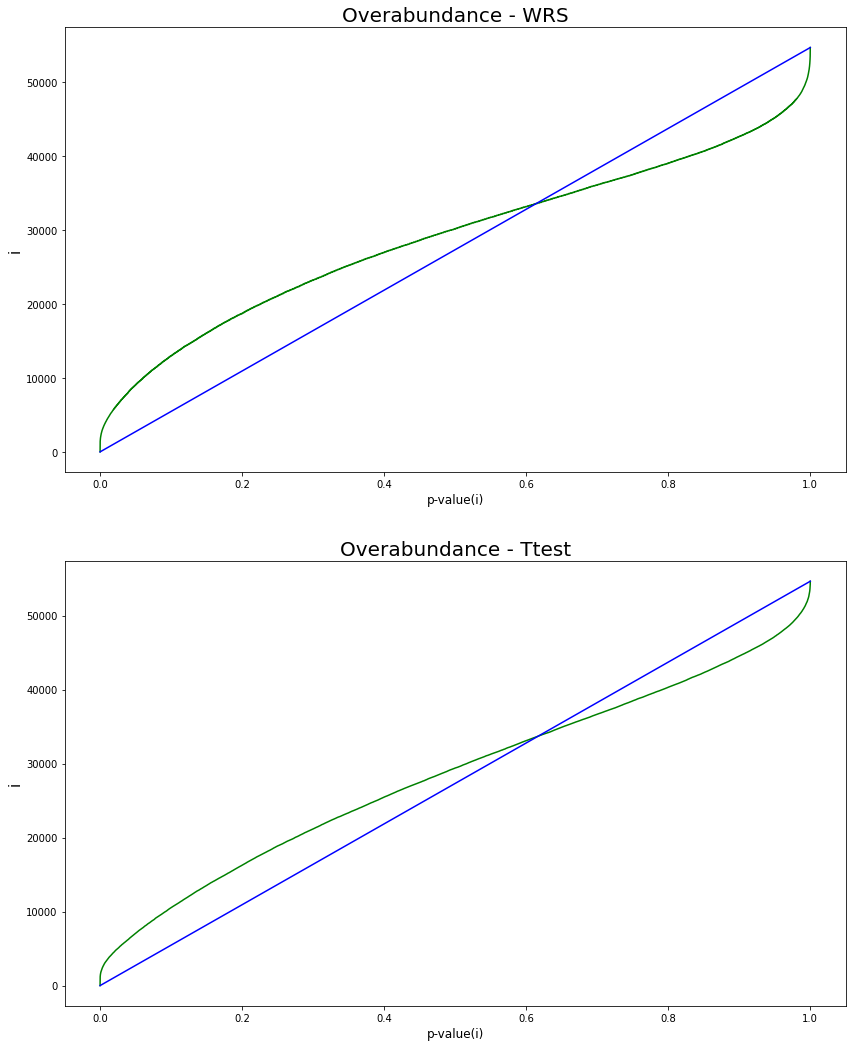

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(14,18))
axes[0].plot(overabundance_WRS, np.arange(len(overabundance_WRS)), color='green')
axes[0].plot(np.linspace(0, 1.0, len(overabundance_WRS)), np.arange(len(overabundance_WRS)), color='blue')
axes[0].set_title("Overabundance - WRS", fontsize=20)
axes[0].set_xlabel('p-value(i)', fontsize=12)
axes[0].set_ylabel('i', fontsize=15)
axes[1].plot(overabundance_Ttest, np.arange(len(overabundance_Ttest)), color='green')
axes[1].plot(np.linspace(0, 1.0, len(overabundance_Ttest)), np.arange(len(overabundance_Ttest)), color='blue')
axes[1].set_title("Overabundance - Ttest", fontsize=20)
axes[1].set_xlabel('p-value(i)', fontsize=12)
axes[1].set_ylabel('i', fontsize=15)

In [27]:
wrs_values = [calc_fdr(WRS_new.T.Pvalue.sort_values(), threshold=i) for i in [0.005, 0.01, 0.05]]
ttest_vales = [calc_fdr(Ttest_new.T.Pvalue.sort_values(), threshold=i) for i in [0.005, 0.01, 0.05]]
answer_table = pd.DataFrame(list(zip(wrs_values, ttest_vales))).T
answer_table.columns = ['0.005', '0.01', '0.05']
answer_table.index = ['WRS', 'Ttest']
print(f"The number of genes we observe at FDR 0.005, 0.01 & 0.05 is:\n")
answer_table

The number of genes we observe at FDR 0.005, 0.01 & 0.05 is:



,0.005,0.01,0.05
WRS,1323,1601,2796
Ttest,1104,1305,2104


2. Select any 3 differentially expressed genes, from D (which
was defined in 3d), and produce a graphical representation of
their expression patterns that demonstrates the observed DE.

In [28]:
new_df = pd.concat((data['Class'], data[cor_data.columns]), axis=1)
sample = pd.concat((new_df.Class, new_df.iloc[:, 1:].sample(3, axis=1)), axis=1)

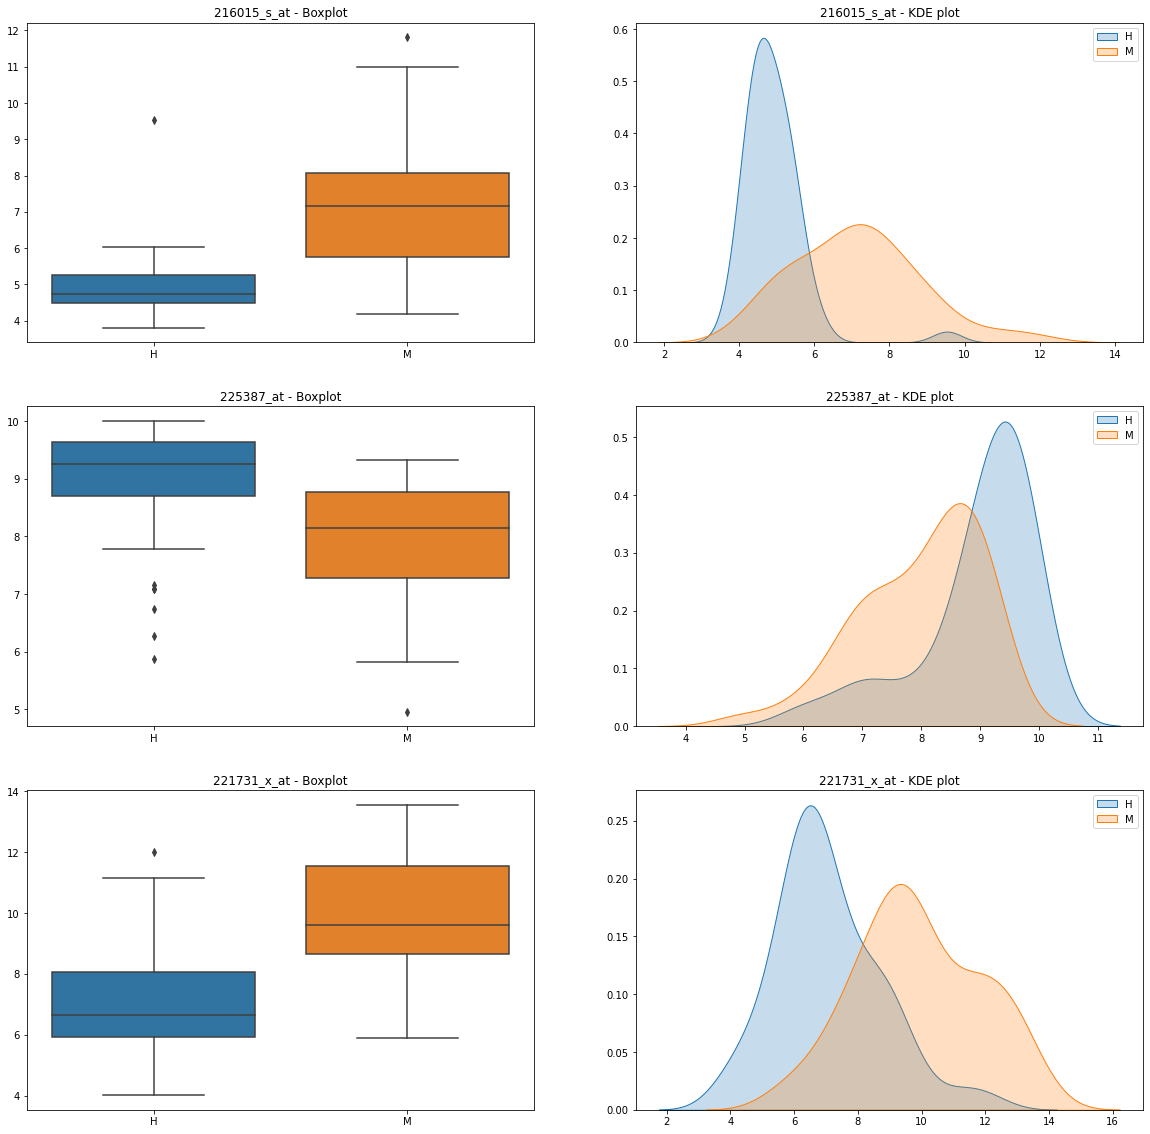

In [29]:
fig, axes = plt.subplots(3,2, figsize=(20, 20))

for idx, smp in enumerate(sample.columns[1:]):
    sns.kdeplot(data=sample[sample.Class == 'H'].iloc[:, idx+1], label='H', ax=axes[idx, 1], shade=True)
    sns.kdeplot(data=sample[sample.Class == 'M'].iloc[:, idx+1], label='M', ax=axes[idx, 1], shade=True)
    sns.boxplot(data=sample, ax=axes[idx, 0], x='Class', y=sample.iloc[:, idx+1])
    axes[idx, 1].set_ylabel('')
    axes[idx, 1].set_xlabel('')
    axes[idx, 1].legend()
    axes[idx, 1].set_title(f"{smp} - KDE plot")
    axes[idx, 0].set_ylabel('')
    axes[idx, 0].set_xlabel('')
    axes[idx, 0].set_title(f"{smp} - Boxplot")

3. Heatmap - Draw a heatmap representation of the expression values of
the genes in D (from 3d), across the entire cohort (all
samples). Order the genes and the samples to produce the
maximal visual effect.

Text(0.5, 1.0, "Heatmap - After sorting by 'Class'")

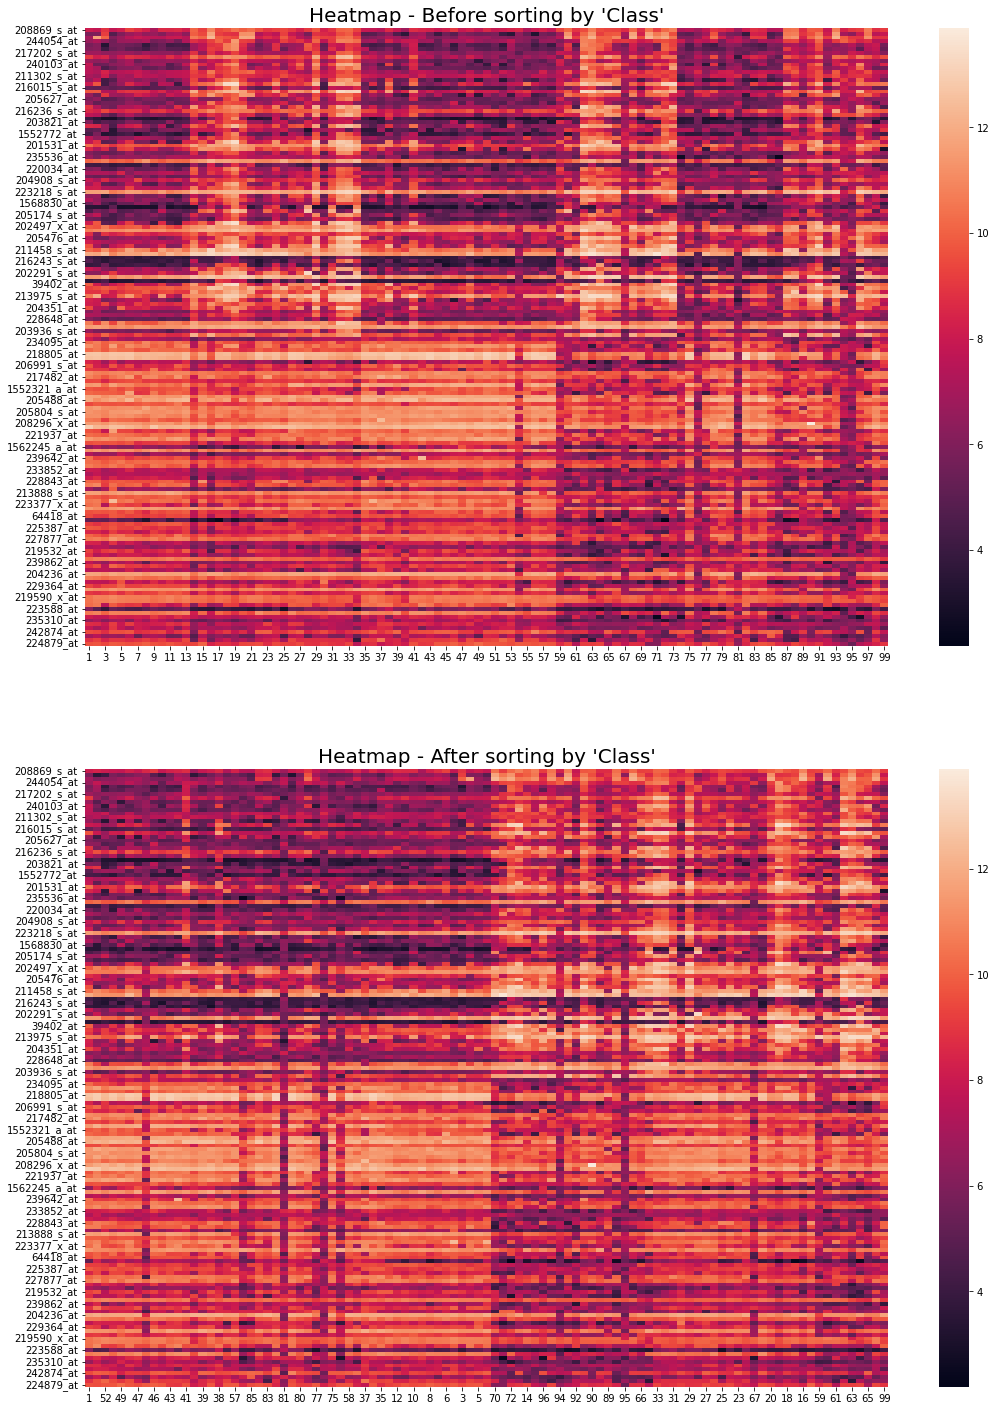

In [30]:
sorted_data = pd.concat((data.Class, cor_data), axis=1).sort_values(by='Class').iloc[:, 1:].T

fig, axes = plt.subplots(2, 1, figsize=(18, 25))
sns.heatmap(cor_data.T, ax=axes[0])
sns.heatmap(sorted_data, ax=axes[1])
axes[0].set_xlabel(''), axes[0].set_ylabel('')
axes[1].set_xlabel(''), axes[1].set_ylabel('')
axes[0].set_title("Heatmap - Before sorting by 'Class'", fontsize=20)
axes[1].set_title("Heatmap - After sorting by 'Class'", fontsize=20)